In [1]:
import numpy as np  
  
def nelder_mead_glafic(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):  
    """  
    Nelder-Mead simplex optimization matching glafic's implementation.  
      
    Parameters:  
    -----------  
    func : callable  
        Function to minimize, takes (x, y) and returns chi-squared value  
    x0, y0 : float  
        Initial parameter values  
    ftol : float  
        Convergence tolerance (default: 1e-4, matching tol_amoeba_lens)  
    nmax : int  
        Maximum iterations (default: 10000, matching nmax_amoeba)  
    verbose : bool  
        Print iteration info  
      
    Returns:  
    --------  
    x_min, y_min, f_min : float  
        Optimal parameters and minimum function value  
    """  
    # Simplex coefficients from glafic  
    ALPHA = 1.0  # reflection coefficient  
    BETA = 0.5   # contraction coefficient  
    GAMMA = 2.0  # expansion coefficient  
      
    n = 2  # number of dimensions  
      
    # Initialize simplex: 3 vertices for 2D problem  
    # v[i] = [x, y] for vertex i  
    v = np.zeros((n + 1, n))  
    f = np.zeros(n + 1)  
      
    # Set initial simplex (matching glafic's initialization pattern)  
    # Initial point  
    v[0] = [x0, y0]  
    # Perturbed points  
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1  
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1  
    v[1] = [x0 + dx, y0]  
    v[2] = [x0, y0 + dy]  
      
    # Evaluate function at initial vertices  
    for i in range(n + 1):  
        f[i] = func(v[i][0], v[i][1])  
      
    k = 0  # function evaluation counter  
      
    # Main optimization loop  
    for itr in range(1, nmax + 1):  
        # Find indices of best, worst, and second-worst vertices  
        vg = np.argmax(f)  # worst (largest value)  
        vs = np.argmin(f)  # best (smallest value)  
          
        # Find second-worst  
        f_temp = f.copy()  
        f_temp[vg] = -np.inf  
        vh = np.argmax(f_temp)  
          
        # Calculate centroid of all points except worst  
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)  
          
        # Reflection  
        vr = vm + ALPHA * (vm - v[vg])  
        fr = func(vr[0], vr[1])  
        k += 1  
          
        if f[vs] <= fr < f[vh]:  
            # Accept reflection  
            v[vg] = vr  
            f[vg] = fr  
        elif fr < f[vs]:  
            # Try expansion  
            ve = vm + GAMMA * (vr - vm)  
            fe = func(ve[0], ve[1])  
            k += 1  
              
            if fe < fr:  
                v[vg] = ve  
                f[vg] = fe  
            else:  
                v[vg] = vr  
                f[vg] = fr  
        else:  
            # Contraction needed  
            if f[vh] <= fr < f[vg]:  
                # Outside contraction  
                vc = vm + BETA * (vr - vm)  
            else:  
                # Inside contraction  
                vc = vm - BETA * (vm - v[vg])  
              
            fc = func(vc[0], vc[1])  
            k += 1  
              
            if fc < f[vg]:  
                v[vg] = vc  
                f[vg] = fc  
            else:  
                # Shrink toward best vertex  
                for i in range(n + 1):  
                    if i != vs:  
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0  
                  
                # Re-evaluate all vertices  
                for i in range(n + 1):  
                    f[i] = func(v[i][0], v[i][1])  
                k += n + 1  
          
        # Check convergence (matching glafic's criterion)  
        max_f = np.max(f)  
        min_f = np.min(f)  
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f))  
          
        if verbose:  
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}")  
          
        if rtol < ftol or abs(max_f) < (0.1 * ftol):  
            break  
      
    # Return best solution  
    vs = np.argmin(f)  
    return v[vs][0], v[vs][1], f[vs]  
  
  
# Example usage with a test function  
def test_chi2(x, y):  
    """Example chi-squared function (Rosenbrock-like)"""  
    return (1 - x)**2 + 100 * (y - x**2)**2  
  
# Find minimum  
x_min, y_min, chi2_min = nelder_mead_glafic(test_chi2, 0.0, 0.0, verbose=True)  
print(f"\nOptimal solution: x = {x_min:.6f}, y = {y_min:.6f}")  
print(f"Minimum chi-squared: {chi2_min:.6e}")

Iteration 1: f_min = 8.200000e-01, rtol = 3.717350e-01
Iteration 2: f_min = 8.200000e-01, rtol = 1.978022e-01
Iteration 3: f_min = 8.200000e-01, rtol = 1.598500e-01
Iteration 4: f_min = 6.729771e-01, rtol = 2.710932e-01
Iteration 5: f_min = 6.635666e-01, rtol = 2.108883e-01
Iteration 6: f_min = 4.740198e-01, rtol = 3.469186e-01
Iteration 7: f_min = 4.740198e-01, rtol = 3.332437e-01
Iteration 8: f_min = 4.278468e-01, rtol = 1.908243e-01
Iteration 9: f_min = 4.108567e-01, rtol = 1.427613e-01
Iteration 10: f_min = 3.321426e-01, rtol = 2.518568e-01
Iteration 11: f_min = 3.321426e-01, rtol = 2.118822e-01
Iteration 12: f_min = 2.660500e-01, rtol = 4.150593e-01
Iteration 13: f_min = 2.660500e-01, rtol = 2.209742e-01
Iteration 14: f_min = 2.660500e-01, rtol = 1.468938e-01
Iteration 15: f_min = 2.187696e-01, rtol = 2.632140e-01
Iteration 16: f_min = 2.187696e-01, rtol = 1.950434e-01
Iteration 17: f_min = 2.147938e-01, rtol = 1.315343e-01
Iteration 18: f_min = 1.758969e-01, rtol = 2.172602e-01
I

In [3]:
import pandas as pd

In [ ]:
from scipy.interpolate import RBFInterpolator  
  
# Your data  
x_data = [...]  # x parameter values  
y_data = [...]  # y parameter values    
z_data = [...]  # chi-squared values  
  
# Create interpolator  
points = np.column_stack([x_data, y_data])  
interpolator = RBFInterpolator(points, z_data)  
  
# Define function for optimizer  
def chi2_func(x, y):  
    return interpolator([[x, y]])[0]  
  
# Find minimum  
x_min, y_min, chi2_min = nelder_mead_glafic(  
    chi2_func,   
    x0=initial_x,   
    y0=initial_y,  
    ftol=1e-4  
)

Iteration 1: f_min = 8.200000e-01, rtol = 3.717350e-01, evals = 5
Iteration 2: f_min = 8.200000e-01, rtol = 1.978022e-01, evals = 7
Iteration 3: f_min = 8.200000e-01, rtol = 1.598500e-01, evals = 9
Iteration 4: f_min = 6.729771e-01, rtol = 2.710932e-01, evals = 11
Iteration 5: f_min = 6.635666e-01, rtol = 2.108883e-01, evals = 13
Iteration 6: f_min = 4.740198e-01, rtol = 3.469186e-01, evals = 15
Iteration 7: f_min = 4.740198e-01, rtol = 3.332437e-01, evals = 16
Iteration 8: f_min = 4.278468e-01, rtol = 1.908243e-01, evals = 18
Iteration 9: f_min = 4.108567e-01, rtol = 1.427613e-01, evals = 20
Iteration 10: f_min = 3.321426e-01, rtol = 2.518568e-01, evals = 22
Iteration 11: f_min = 3.321426e-01, rtol = 2.118822e-01, evals = 23
Iteration 12: f_min = 2.660500e-01, rtol = 4.150593e-01, evals = 25
Iteration 13: f_min = 2.660500e-01, rtol = 2.209742e-01, evals = 27
Iteration 14: f_min = 2.660500e-01, rtol = 1.468938e-01, evals = 28
Iteration 15: f_min = 2.187696e-01, rtol = 2.632140e-01, eva

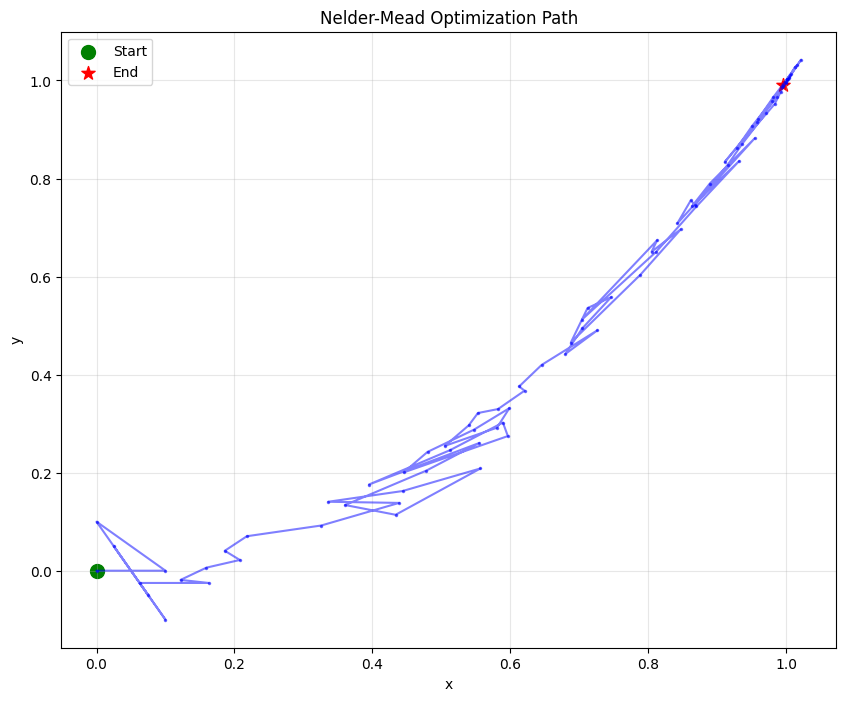

In [2]:
import numpy as np  
  
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):  
    """  
    Nelder-Mead simplex optimization matching glafic's implementation,  
    with tracking of all evaluation points.  
      
    Parameters:  
    -----------  
    func : callable  
        Function to minimize, takes (x, y) and returns chi-squared value  
    x0, y0 : float  
        Initial parameter values  
    ftol : float  
        Convergence tolerance (default: 1e-4, matching tol_amoeba_lens)  
    nmax : int  
        Maximum iterations (default: 10000, matching nmax_amoeba)  
    verbose : bool  
        Print iteration info  
      
    Returns:  
    --------  
    x_min, y_min, f_min : float  
        Optimal parameters and minimum function value  
    eval_history : list of tuples  
        List of (x, y, f) for every function evaluation  
    """  
    # Simplex coefficients from glafic  
    ALPHA = 1.0  # reflection coefficient  
    BETA = 0.5   # contraction coefficient  
    GAMMA = 2.0  # expansion coefficient  
      
    n = 2  # number of dimensions  
      
    # Initialize simplex: 3 vertices for 2D problem  
    v = np.zeros((n + 1, n))  
    f = np.zeros(n + 1)  
      
    # Track all evaluations  
    eval_history = []  
      
    # Set initial simplex  
    v[0] = [x0, y0]  
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1  
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1  
    v[1] = [x0 + dx, y0]  
    v[2] = [x0, y0 + dy]  
      
    # Evaluate function at initial vertices and record  
    for i in range(n + 1):  
        f[i] = func(v[i][0], v[i][1])  
        eval_history.append((v[i][0], v[i][1], f[i]))  
      
    k = 0  # function evaluation counter  
      
    # Main optimization loop  
    for itr in range(1, nmax + 1):  
        # Find indices of best, worst, and second-worst vertices  
        vg = np.argmax(f)  # worst (largest value)  
        vs = np.argmin(f)  # best (smallest value)  
          
        # Find second-worst  
        f_temp = f.copy()  
        f_temp[vg] = -np.inf  
        vh = np.argmax(f_temp)  
          
        # Calculate centroid of all points except worst  
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)  
          
        # Reflection  
        vr = vm + ALPHA * (vm - v[vg])  
        fr = func(vr[0], vr[1])  
        eval_history.append((vr[0], vr[1], fr))  
        k += 1  
          
        if f[vs] <= fr < f[vh]:  
            # Accept reflection  
            v[vg] = vr  
            f[vg] = fr  
        elif fr < f[vs]:  
            # Try expansion  
            ve = vm + GAMMA * (vr - vm)  
            fe = func(ve[0], ve[1])  
            eval_history.append((ve[0], ve[1], fe))  
            k += 1  
              
            if fe < fr:  
                v[vg] = ve  
                f[vg] = fe  
            else:  
                v[vg] = vr  
                f[vg] = fr  
        else:  
            # Contraction needed  
            if f[vh] <= fr < f[vg]:  
                # Outside contraction  
                vc = vm + BETA * (vr - vm)  
            else:  
                # Inside contraction  
                vc = vm - BETA * (vm - v[vg])  
              
            fc = func(vc[0], vc[1])  
            eval_history.append((vc[0], vc[1], fc))  
            k += 1  
              
            if fc < f[vg]:  
                v[vg] = vc  
                f[vg] = fc  
            else:  
                # Shrink toward best vertex  
                for i in range(n + 1):  
                    if i != vs:  
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0  
                  
                # Re-evaluate all vertices and record  
                for i in range(n + 1):  
                    f[i] = func(v[i][0], v[i][1])  
                    eval_history.append((v[i][0], v[i][1], f[i]))  
                k += n + 1  
          
        # Check convergence  
        max_f = np.max(f)  
        min_f = np.min(f)  
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f))  
          
        if verbose:  
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}, evals = {len(eval_history)}")  
          
        if rtol < ftol or abs(max_f) < (0.1 * ftol):  
            break  
      
    # Return best solution and history  
    vs = np.argmin(f)  
    return v[vs][0], v[vs][1], f[vs], eval_history  
  
  
# Example usage  
def test_chi2(x, y):  
    """Example chi-squared function"""  
    return (1 - x)**2 + 100 * (y - x**2)**2  
  
# Find minimum with history  
x_min, y_min, chi2_min, history = nelder_mead_glafic_with_history(  
    test_chi2, 0.0, 0.0, verbose=True  
)  
  
print(f"\nOptimal solution: x = {x_min:.6f}, y = {y_min:.6f}")  
print(f"Minimum chi-squared: {chi2_min:.6e}")  
print(f"Total function evaluations: {len(history)}")  
  
# Extract just the (x, y) coordinates  
xy_points = [(x, y) for x, y, f in history]  
print(f"\nFirst 10 evaluation points:")  
for i, (x, y) in enumerate(xy_points[:10]):  
    print(f"  {i+1}: ({x:.6f}, {y:.6f})")  
  
# You can also save to file or visualize  
import matplotlib.pyplot as plt  
x_vals = [x for x, y, f in history]  
y_vals = [y for x, y, f in history]  
plt.figure(figsize=(10, 8))  
plt.plot(x_vals, y_vals, 'b.-', alpha=0.5, markersize=3)  
plt.scatter(x_vals[0], y_vals[0], c='green', s=100, marker='o', label='Start')  
plt.scatter(x_vals[-1], y_vals[-1], c='red', s=100, marker='*', label='End')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.title('Nelder-Mead Optimization Path')  
plt.legend()  
plt.grid(True, alpha=0.3)  
plt.show()